# Telco_Churn

---
I. Problem definition

1. Import Packages and Data
2. Userdefined Funktions
3. First Look at the Data
4. EDA
5. Feature Selection
6. Processing
7. Class Weights
8. Modeling
9. Hyperparameter Optimization
10. Ensemble Methods
11. Visualization of Final Model


---

## I. Problem definition



## 1. Import Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from mlxtend.classifier import StackingCVClassifier
from scipy import stats


In [3]:
def first_look(col):
    
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))
    
def evaluation(model,x_test,y_test):
    
    print("Test AUC:",roc_auc_score(y_test, model.predict_proba(x_test)[:,1]))
    print('Train AUC:',roc_auc_score(ytrain, model.predict_proba(xtrain)[:,1]))

In [4]:
df = pd.read_csv("D:\Programming\Python\Kaggle\Covid\covid_data.csv")

In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [7]:
df.describe().T.style.background_gradient(cmap="RdPu")

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.000000,1.632194,0.482208,1.000000,1.000000,2.000000,2.000000,2.000000
MEDICAL_UNIT,1048575.000000,8.980565,3.723278,1.000000,4.000000,12.000000,12.000000,13.000000
SEX,1048575.000000,1.499259,0.500000,1.000000,1.000000,1.000000,2.000000,2.000000
PATIENT_TYPE,1048575.000000,1.190765,0.392904,1.000000,1.000000,1.000000,1.000000,2.000000
INTUBED,1048575.000000,79.522875,36.868886,1.000000,97.000000,97.000000,97.000000,99.000000
PNEUMONIA,1048575.000000,3.346831,11.912881,1.000000,2.000000,2.000000,2.000000,99.000000
AGE,1048575.000000,41.794102,16.907389,0.000000,30.000000,40.000000,53.000000,121.000000
PREGNANT,1048575.000000,49.765585,47.510733,1.000000,2.000000,97.000000,97.000000,98.000000
DIABETES,1048575.000000,2.186404,5.424242,1.000000,2.000000,2.000000,2.000000,98.000000
COPD,1048575.000000,2.260569,5.132258,1.000000,2.000000,2.000000,2.000000,98.000000


In [8]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [9]:
df.describe(include=object).T

,count,unique,top,freq
DATE_DIED,1048575,401,9999-99-99,971633


In [14]:
df["DEATH"] = [0 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

column name    :  DEATH
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0    971633
1     76942
Name: DEATH, dtype: int64


([<matplotlib.patches.Wedge at 0x27429ccc7c0>,
 [Text(-1.0709017965481111, 0.2513351192134281, ''),
  Text(1.070901802431034, -0.2513350941471624, '')],
 [Text(-0.584128252662606, 0.1370918832073244, '92.7%'),
  Text(0.584128255871473, -0.13709186953481584, '7.3%')])

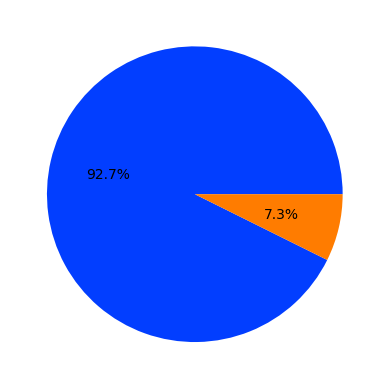

In [15]:
first_look('DEATH')
Death_state = list(df['DEATH'].value_counts())
colors = sns.color_palette('bright')[0:5]
plt.pie(x = Death_state, colors = colors, autopct='%.1f%%')

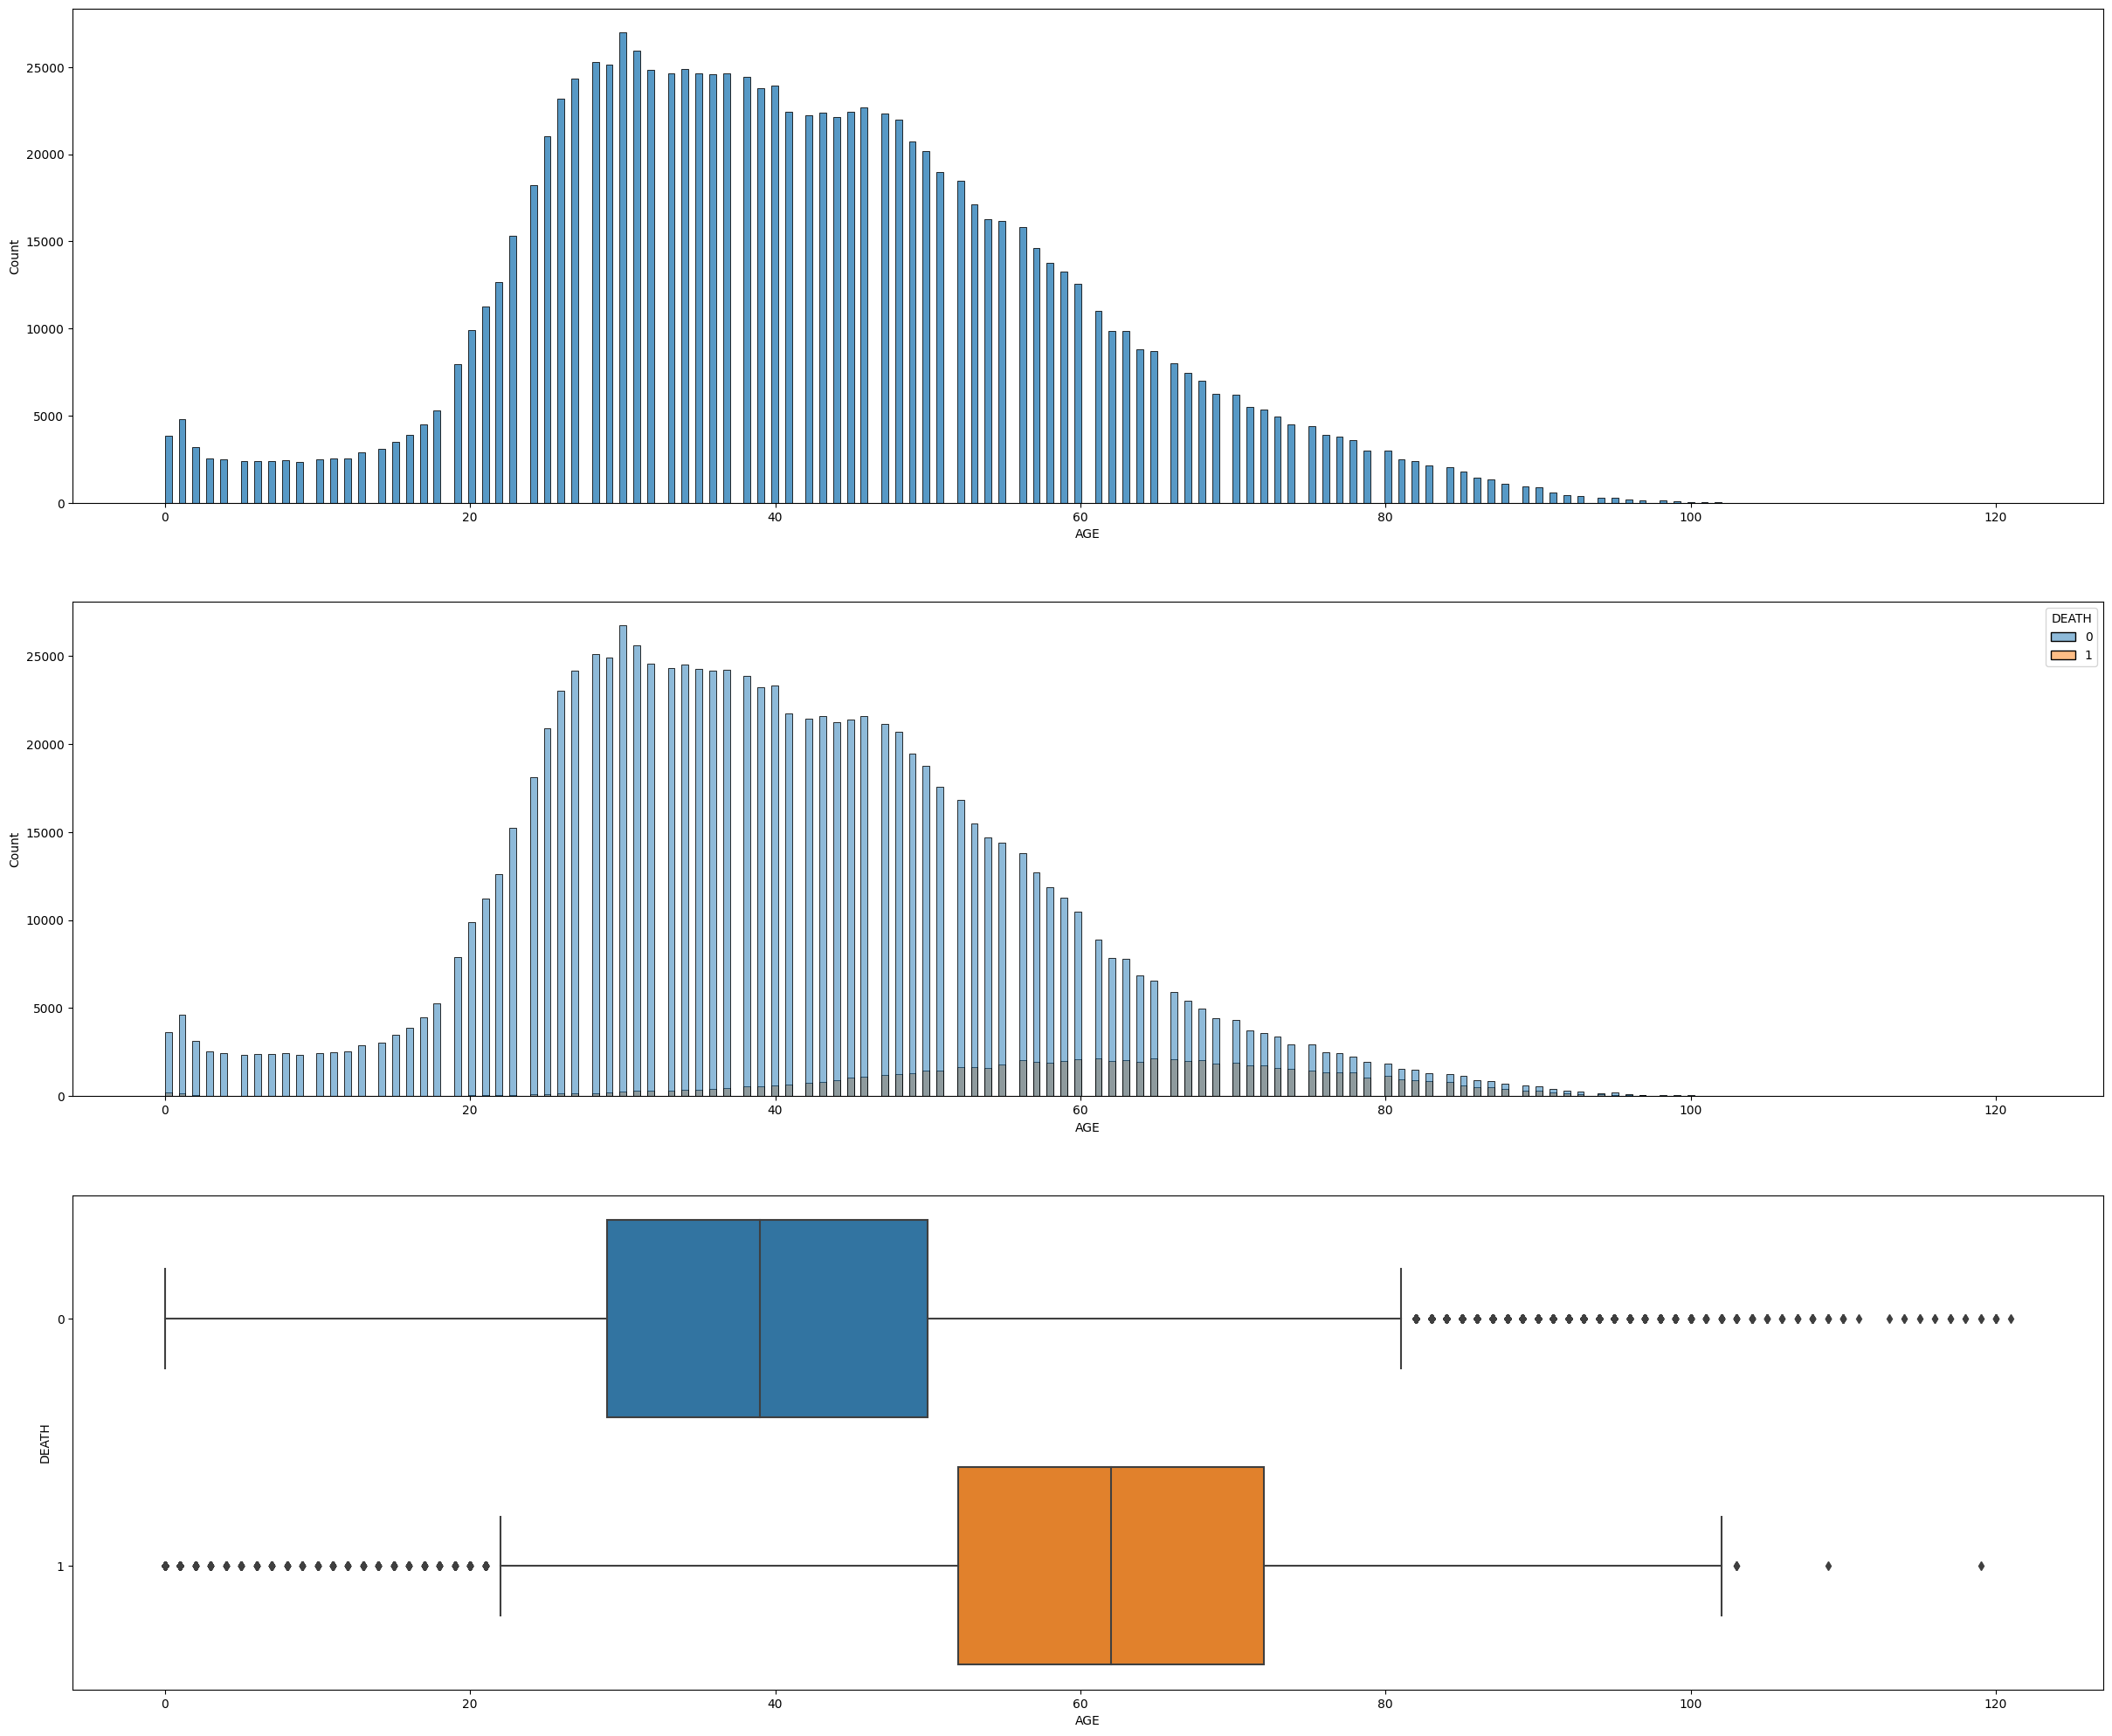

In [19]:
fig, ax = plt.subplots(3, figsize=(30, 25))

t = sns.histplot(data=df, x="AGE", ax=ax[0])
t = sns.histplot(data=df, x="AGE", ax=ax[1], hue="DEATH")
t = sns.boxplot(x="AGE", y="DEATH", orient="h", data=df, ax=ax[2])

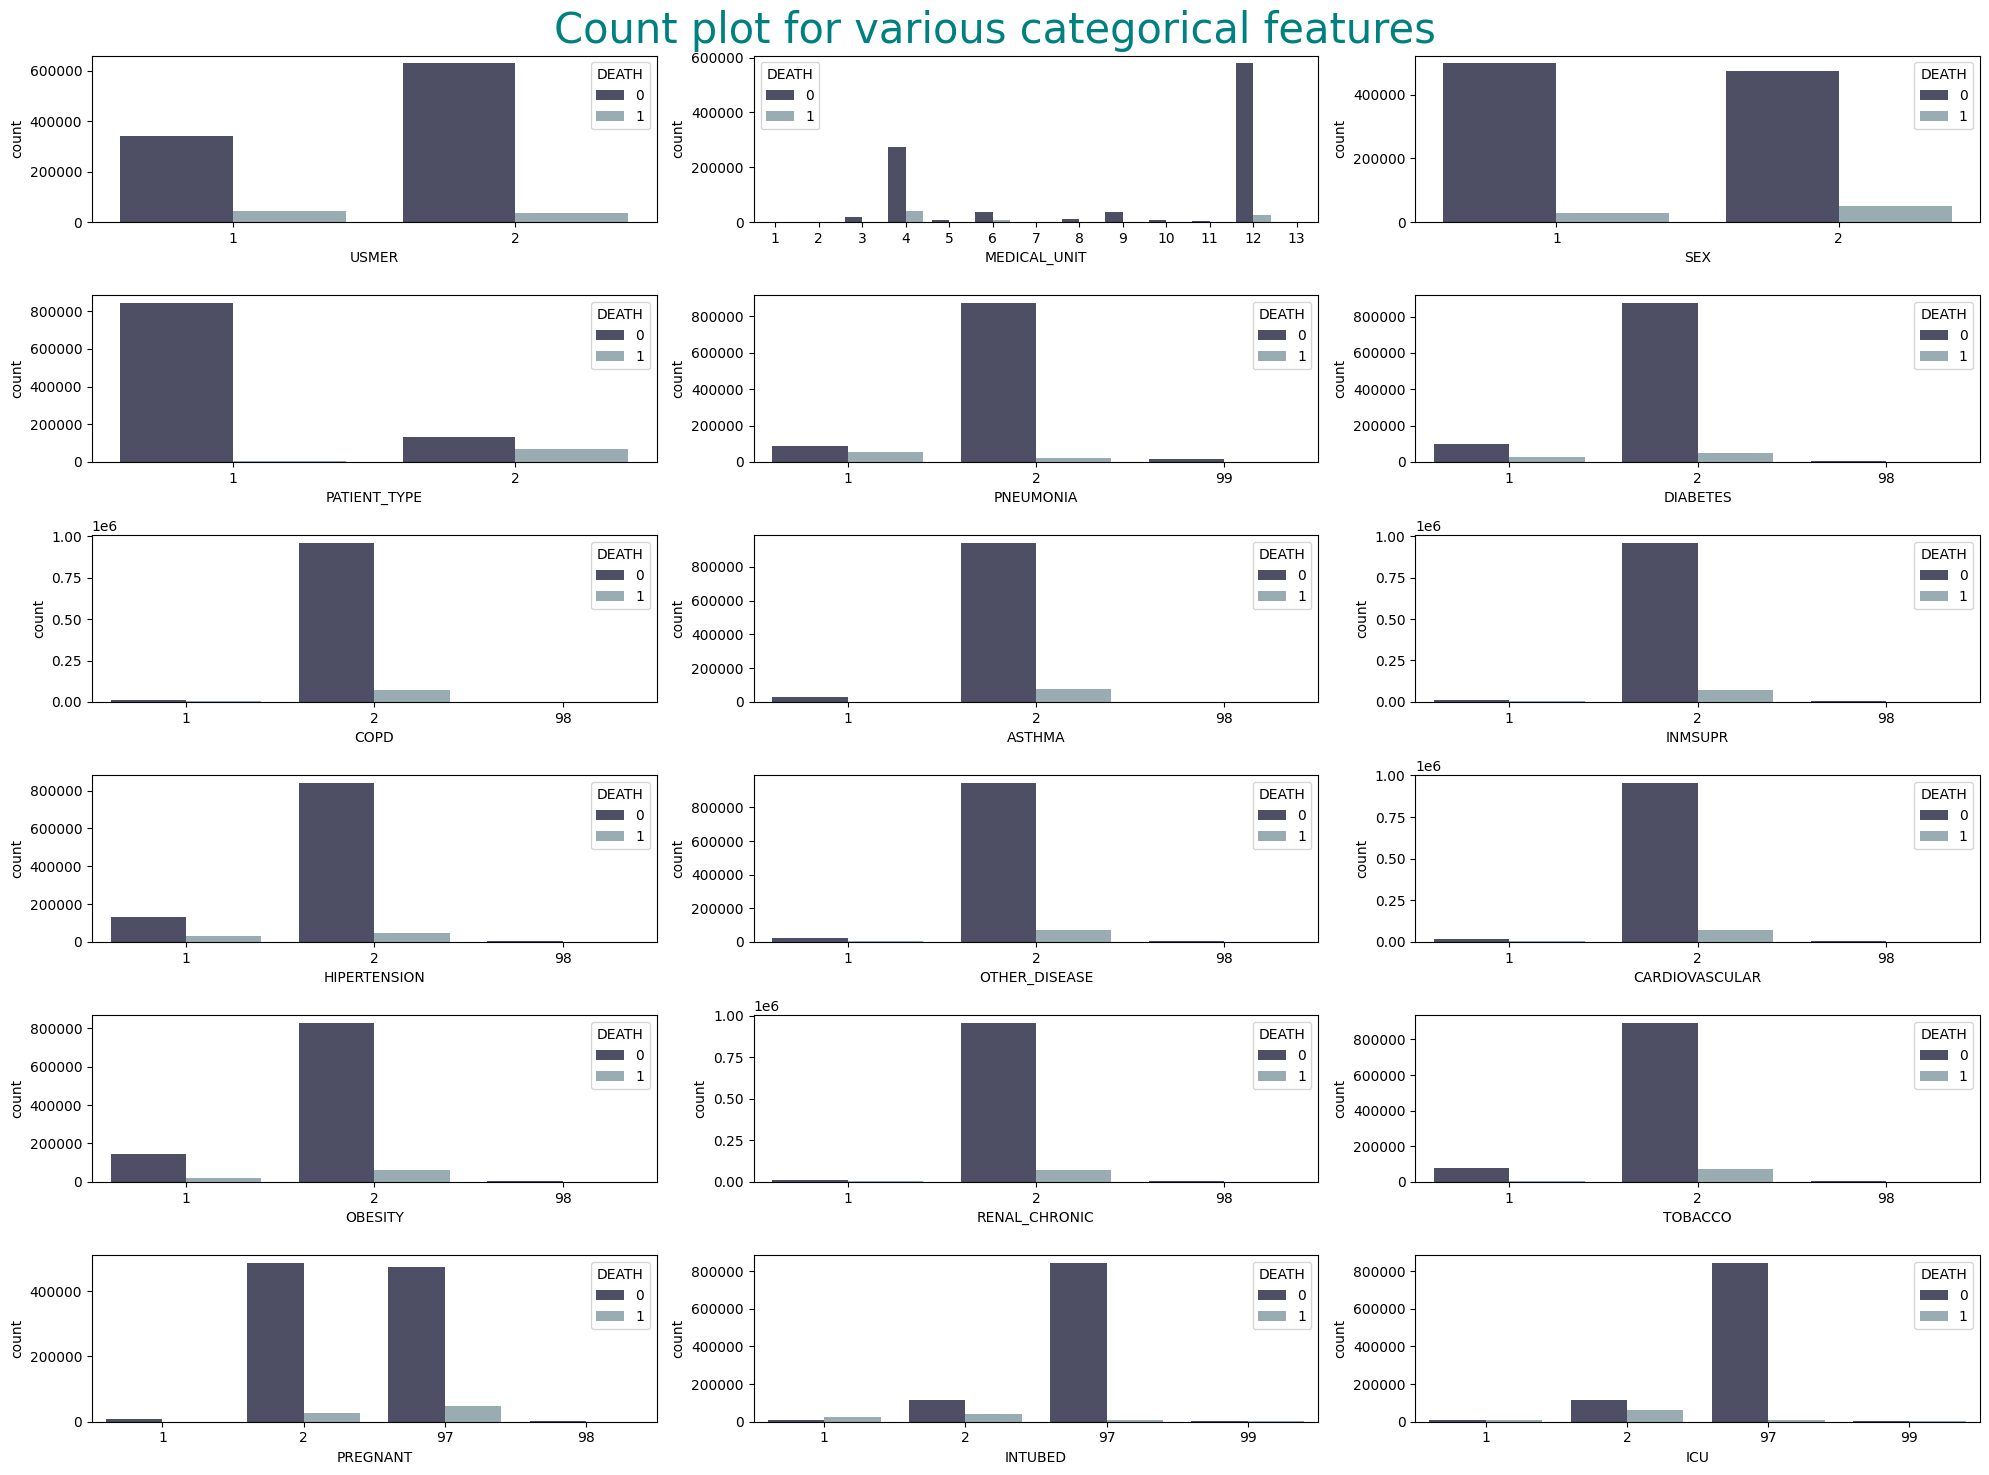

In [20]:
fig, ax = plt.subplots(6, 3, figsize = (20, 15))


plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='USMER', data= df, hue= 'DEATH', ax= ax[0, 0], palette= 'bone')
ax1.set(xlabel = 'USMER')

ax2 = sns.countplot(x ='MEDICAL_UNIT', data= df, hue= 'DEATH', ax= ax[0, 1], palette= 'bone')
ax2.set(xlabel = 'MEDICAL_UNIT')

ax3 = sns.countplot(x ='SEX', data= df, hue= 'DEATH', ax= ax[0, 2], palette= 'bone')
ax3.set(xlabel = 'SEX')

ax4 = sns.countplot(x ='PATIENT_TYPE', data= df, hue= 'DEATH', ax= ax[1, 0], palette= 'bone')
ax4.set(xlabel = 'PATIENT_TYPE')

ax5 = sns.countplot(x ='PNEUMONIA', data= df, hue= 'DEATH', ax= ax[1, 1], palette= 'bone')
ax5.set(xlabel = 'PNEUMONIA')

ax6 = sns.countplot(x ='DIABETES', data= df, hue= 'DEATH', ax= ax[1, 2], palette= 'bone')
ax6.set(xlabel = 'DIABETES')

ax7 = sns.countplot(x ='COPD', data= df, hue= 'DEATH', ax= ax[2, 0], palette= 'bone')
ax7.set(xlabel = 'COPD')

ax8 = sns.countplot(x ='ASTHMA', data= df, hue= 'DEATH', ax= ax[2, 1], palette= 'bone')
ax8.set(xlabel = 'ASTHMA')

ax9 = sns.countplot(x ='INMSUPR', data= df, hue= 'DEATH', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'INMSUPR')

ax9 = sns.countplot(x ='HIPERTENSION', data= df, hue= 'DEATH', ax= ax[3, 0], palette= 'bone')
ax9.set(xlabel = 'HIPERTENSION')

ax10 = sns.countplot(x ='OTHER_DISEASE', data= df, hue= 'DEATH', ax= ax[3, 1], palette= 'bone')
ax10.set(xlabel = 'OTHER_DISEASE')

ax11 = sns.countplot(x ='CARDIOVASCULAR', data= df, hue= 'DEATH', ax= ax[3, 2], palette= 'bone')
ax11.set(xlabel = 'CARDIOVASCULAR')

ax12 = sns.countplot(x ='OBESITY', data= df, hue= 'DEATH', ax= ax[4, 0], palette= 'bone')
ax12.set(xlabel = 'OBESITY')

ax13 = sns.countplot(x ='RENAL_CHRONIC', data= df, hue= 'DEATH', ax= ax[4, 1], palette= 'bone')
ax13.set(xlabel = 'RENAL_CHRONIC')

ax14 = sns.countplot(x ='TOBACCO', data= df, hue= 'DEATH', ax= ax[4, 2], palette= 'bone')
ax14.set(xlabel = 'TOBACCO')

ax14 = sns.countplot(x ='PREGNANT', data= df, hue= 'DEATH', ax= ax[5, 0], palette= 'bone')
ax14.set(xlabel = 'PREGNANT')

ax14 = sns.countplot(x ='INTUBED', data= df, hue= 'DEATH', ax= ax[5, 1], palette= 'bone')
ax14.set(xlabel = 'INTUBED')

ax14 = sns.countplot(x ='ICU', data= df, hue= 'DEATH', ax= ax[5, 2], palette= 'bone')
ax14.set(xlabel = 'ICU')



plt.tight_layout()
plt.show()

In [14]:

df = df.drop("DATE_DIED", axis = 1)

In [15]:

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df, df['DEATH']):
    X_train_base = df.iloc[train_index]
    X_test_base = df.iloc[valid_index]


In [ ]:
y_train = X_train_base["DEATH"]
X_train_base = X_train_base.drop("DEATH", axis = 1)

In [17]:
all_features = list(X_train_base.columns)
print(all_features)
sel_features = [element for element in all_features if element not in ["INTUBED", "PREGNANT", "ICU"]]
print(sel_features)
cat_features = ["MEDICAL_UNIT"]
num_features = ["AGE"]
ord_features = list(set(sel_features) - set(cat_features) - set(num_features))

['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']
['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin


class preprocessing(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X=X.replace([97,98, 99],np.NaN)
        X=X.drop(columns=["INTUBED", "PREGNANT", "ICU"])
        X=pd.DataFrame(X)
        X.columns = sel_features
        return X

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

pre_pipeline = Pipeline([
    ("pre", preprocessing()),
])

num_pipeline = Pipeline([
    ("mediumImp", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("modeImp", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder())
])

ord_pipeline = Pipeline([
    ("modeImp", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OrdinalEncoder())
])

from sklearn.compose import ColumnTransformer

transformer_pipeline = ColumnTransformer([
#        ("pre", pre_pipeline, all_features),
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),
        ("ord", ord_pipeline, ord_features)
    ])

In [20]:
prepare_pipeline = Pipeline([
    ('preparation', pre_pipeline),   
    ('feature_encoding', transformer_pipeline),
])

In [21]:
X_train_pre = prepare_pipeline.fit_transform(X_train_base)

In [22]:
pd.set_option("display.max_rows", 10, "display.max_columns", None)
X_train_pre = pd.DataFrame(X_train_pre)
X_train_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.757145,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,0.368570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.223912,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,0.724059,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,1.731277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754968,0.961051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
754969,2.264511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
754970,0.309321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
754971,0.427818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold

random_state = 2
classifiers = []
#classifiers.append(SVC(random_state=random_state,))
classifiers.append(DecisionTreeClassifier(random_state=random_state,))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state,),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state,))
classifiers.append(ExtraTreesClassifier(random_state=random_state,))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(xgboost.XGBClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

In [24]:
kfold=StratifiedKFold(n_splits=3,shuffle=True)
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_pre, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))
    print(classifier)

DecisionTreeClassifier(random_state=2)
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=2),
                   learning_rate=0.1, random_state=2)
RandomForestClassifier(random_state=2)
ExtraTreesClassifier(random_state=2)
GradientBoostingClassifier(random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              pr

   CrossValMeans  CrossValerrors           Algorithm
0       0.597766        0.000896        DecisionTree
1       0.597950        0.000035            AdaBoost
2       0.612654        0.001195        RandomForest
3       0.605731        0.001080          ExtraTrees
4       0.646560        0.001093    GradientBoosting
5       0.648697        0.000724             Xgboost
6       0.588602        0.000579         KNeighboors
7       0.636832        0.001141  LogisticRegression


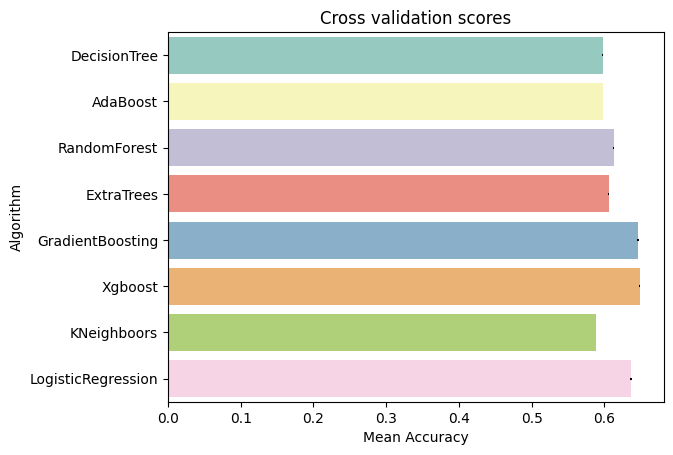

In [27]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot(x=cv_res["CrossValMeans"],y =cv_res["Algorithm"],  palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
#oversampling the minority classes with synthetic cases
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train_base, y_train)

In [ ]:
y_train_oversampled.value_counts()

In [ ]:
kfold=StratifiedKFold(n_splits=3,shuffle=True)
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_oversampled, y = y_train_oversampled, scoring = "roc_auc", cv =kfold , n_jobs=-1))
    print(classifier)

In [ ]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot(x=cv_res["CrossValMeans"],y =cv_res["Algorithm"],  palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights

In [ ]:
random_state = 2
classifiers = []
#classifiers.append(SVC(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(ExtraTreesClassifier(random_state=random_state,class_weight=dict(enumerate(class_weights))))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(xgboost.XGBClassifier(random_state=random_state,class_weight=class_weights))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state,class_weight=class_weights))

In [ ]:
kfold=StratifiedKFold(n_splits=3,shuffle=True)
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_pre, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))
    print(classifier)

In [ ]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Xgboost","KNeighboors","LogisticRegression"]})
print(cv_res)

g = sns.barplot(x=cv_res["CrossValMeans"],y =cv_res["Algorithm"],  palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
GBC = GradientBoostingClassifier()
gb_param_grid = {
                 
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              
              }
gsGBC=RandomizedSearchCV(estimator=GBC,param_distributions=gb_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)
 

gsGBC.fit(xtrain,ytrain)